# Map Projections

## Objectives

- Understand what a projection is and why we need it
- Transform data from one projection to another

## Resources

- [`cartopy`](https://scitools.org.uk/cartopy/docs/latest/) for map projections and transformations

In [1]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import numpy as np

## Create some mock data

In [2]:
# create a mock dataset
lon1 = 140
lon2 = 210
n_lon = 70
lon = np.linspace(lon1,lon2,n_lon)
lat1 = -70
lat2 = -10
n_lat = 60
lat = np.linspace(lat1,lat2,n_lat)

LON, LAT = np.meshgrid(lon,lat)

lon_nz = 175
lat_nz = -41

Z = np.exp(-((LON-lon_nz)**2 + (LAT-lat_nz)**2)/30)

extent = [lon1,lon2,lat1,lat2]

## Equirectangular and other projections

In [3]:
lonlat = ccrs.PlateCarree(central_longitude=180)
lonlat

<Projected CRS: +proj=eqc +ellps=WGS84 +a=6378137.0 +lon_0=180 +to ...>
Name: unknown
Axis Info [cartesian]:
- E[east]: Easting (unknown)
- N[north]: Northing (unknown)
- h[up]: Ellipsoidal height (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unknown
- method: Equidistant Cylindrical
Datum: Unknown based on WGS 84 ellipsoid
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [4]:
ortho = ccrs.Orthographic(central_latitude=lat_nz,central_longitude=lon_nz)
ortho

<Projected CRS: +proj=ortho +a=6378137.0 +lon_0=175 +lat_0=-41 +no ...>
Name: unknown
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unknown
- method: Orthographic
Datum: unknown
- Ellipsoid: unknown
- Prime Meridian: Greenwich

In [5]:
epsg_2193 = ccrs.epsg(2193)
epsg_2193

_EPSGProjection(2193)

In [6]:
lonlat_rot = ccrs.RotatedPole(pole_latitude=90-lat_nz, pole_longitude=180+lon_nz)
lonlat_rot

<Derived Geographic 2D CRS: +proj=ob_tran +ellps=WGS84 +a=6378137.0 +o_proj=la ...>
Name: unnamed
Axis Info [ellipsoidal]:
- lon[east]: Longitude (degree)
- lat[north]: Latitude (degree)
Area of Use:
- undefined
Coordinate Operation:
- name: unknown
- method: PROJ ob_tran o_proj=latlon
Datum: Unknown based on WGS 84 ellipsoid
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

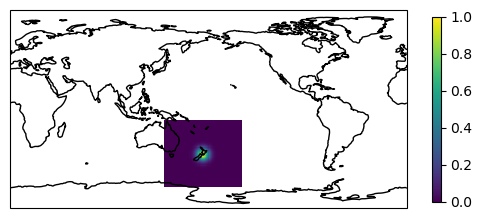

In [7]:
fig, ax = plt.subplots(1,1,subplot_kw={"projection": lonlat})
ax.coastlines()
ax.set_global()

# im = ax.imshow(Z, vmin=0, vmax=1, extent=extent, origin="lower", transform=ccrs.PlateCarree())
im = ax.pcolormesh(LON,LAT, Z, vmin=0, vmax=1, transform=ccrs.PlateCarree())
plt.colorbar(im,ax=ax,shrink=0.5)

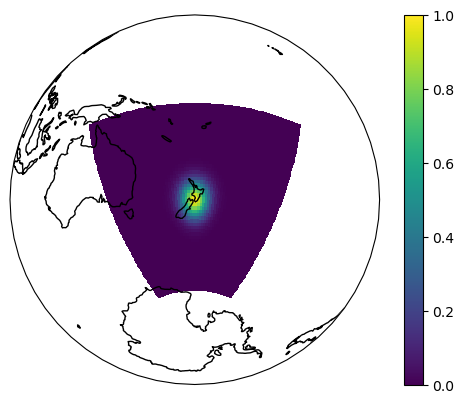

In [8]:
fig, ax = plt.subplots(1,1,subplot_kw={"projection": ortho})
ax.coastlines()
ax.set_global()

# im = ax.imshow(Z, vmin=0, vmax=1, extent=extent, origin="lower", transform=ccrs.PlateCarree())
im = ax.pcolormesh(LON,LAT, Z, vmin=0, vmax=1, transform=ccrs.PlateCarree())
plt.colorbar(im,ax=ax)

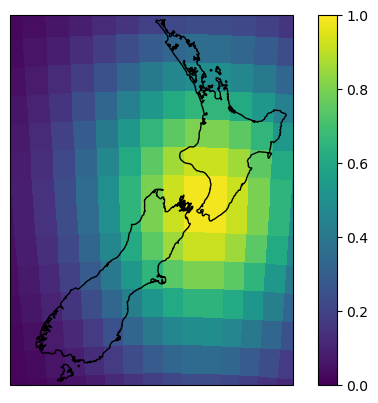

In [9]:
fig, ax = plt.subplots(1,1,subplot_kw={"projection": epsg_2193})
ax.coastlines()

# im = ax.imshow(Z, vmin=0, vmax=1, extent=extent, origin="lower", transform=ccrs.PlateCarree())
im = ax.pcolormesh(LON,LAT, Z, vmin=0, vmax=1, transform=ccrs.PlateCarree())
plt.colorbar(im,ax=ax)

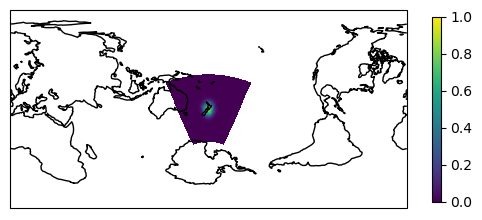

In [10]:
fig, ax = plt.subplots(1,1,subplot_kw={"projection": lonlat_rot})
ax.coastlines()
ax.set_global()

# im = ax.imshow(Z, vmin=0, vmax=1, extent=extent, origin="lower", transform=ccrs.PlateCarree())
im = ax.pcolormesh(LON,LAT, Z, vmin=0, vmax=1, transform=ccrs.PlateCarree())
plt.colorbar(im,ax=ax, shrink=0.5)